In [19]:
#Imports.
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from joblib import dump, load
import matplotlib.pyplot as plt

Reads and displays UKDALE mains data, formatted to include the UNIX timestamp.  
UNIX | Apparent | Active | Reactive

In [3]:
#Takes UKDALE Mains CSV and reads as a pandas Dataframe.
df = read_csv(r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\UKDALE Mains Data\h1-5_2014_july.csv', header=[0,1,2])
df.head()

physical_quantity              power                                      
               type           apparent             active           reactive
              index Unnamed: 1_level_2 Unnamed: 2_level_2 Unnamed: 3_level_2
0      1.404169e+09             155.14             104.32         114.829254
1      1.404169e+09             157.34             105.67         116.574980
2      1.404169e+09             155.81             104.63         115.452675
3      1.404169e+09             156.35             105.06         115.791710
4      1.404169e+09             155.32             104.39         115.008840

Ignore headers and print the useable data.

In [4]:
data = df.values

In [5]:
print(data)

[[1.40416920e+09 1.55140000e+02 1.04320000e+02 1.14829254e+02]
 [1.40416920e+09 1.57340000e+02 1.05670000e+02 1.16574980e+02]
 [1.40416920e+09 1.55810000e+02 1.04630000e+02 1.15452675e+02]
 ...
 [1.40684760e+09 5.06890000e+02 3.15580000e+02 3.96669600e+02]
 [1.40684760e+09 5.06600000e+02 3.15210000e+02 3.96593260e+02]
 [1.40684760e+09 5.07690000e+02 3.15920000e+02 3.97421300e+02]]


Splitting of data into variables, x (UNIX, Apparent, Active), and output, y (Reactive).

In [6]:
X, y = data[:,:-1], data[:,-1]
print(X.shape, y.shape)

(5318429, 3) (5318429,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3563347, 3) (1755082, 3) (3563347,) (1755082,)


Random forrest regressor model in the hopes of a Mean Absolute Error value.

In [8]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [25]:
#baaaaaad idea: ~31GB file
#dump(model, r'C:\Users\44749\NILM\nilm_analyzer_EM401\Processed Data\H1-5_2014_july.joblib')

['C:\\Users\\44749\\NILM\\nilm_analyzer_EM401\\Processed Data\\H1-5_2014_july.joblib']

Progress...

In [9]:
yhat = model.predict(X_test)

In [15]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.276


Concatenated H1 and H5 July - Good MAE 0.276 VAR - About an hour and a half all in simualtion time, long but can leave to do if required.

In [11]:
print(y_test)
print(yhat)

[365.05112 426.05838 110.1309  ... 422.54037 196.9096  170.48993]
[365.0020118  426.0671099  110.12957055 ... 422.5378336  196.8809356
 170.4955074 ]


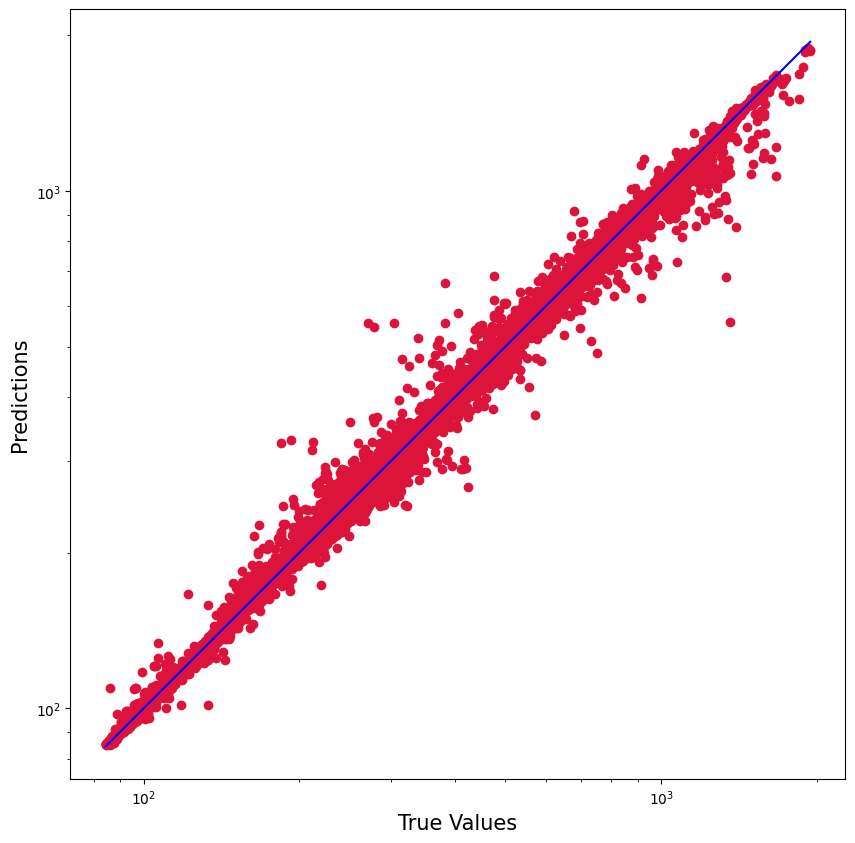

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, yhat, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

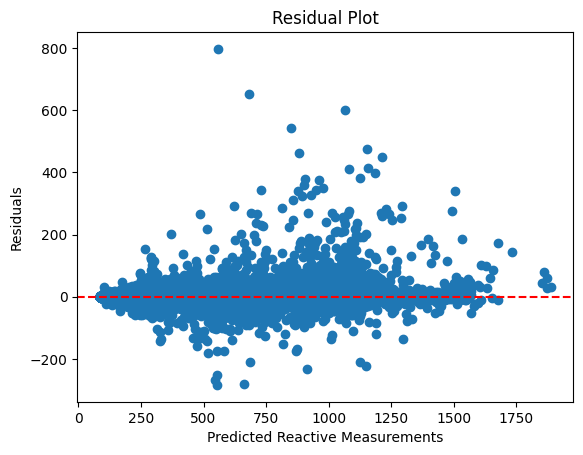

In [24]:
residuals = y_test - yhat
plt.scatter(yhat, residuals)
plt.xlabel('Predicted Reactive Measurements')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()